# # 24.07.11 머신러닝 학습 2회차: 로지스틱 회귀 모델

## 01 개념

### 로지스틱 회귀

1. 로지스틱 회귀는 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀이다.

2. 선형 회귀가 분류를 못하는 건 아니지만 정확도가 떨어진다.

3. 로지스틱 회귀 클래스의 회귀 계수 최적화는 경사 하강법 외에 다양한 최적화 방안을 선택할 수 있다. 방법은 아래와 같다.

4. 다양한 solver 파라미터가 있지만 이들간의 성능 차이는 미비하며 일반적으로 lbfgs  또는 liblinear를 선택하는 것이 대부분이다.

### 시그모이드 함수

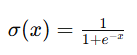

1. 많은 사회, 자연 현상에서 특정 변수의 확률 값은 선형이 아니라 시그모이드 함수처럼 s자 커브 형태를 띈다.

2. x값이 아무리 커지거나 작아져도 y값은 항상 0과 1 사이 값을 반환한다.

3. x가 0일 때는 0.5이다.

### ROC-AUC

1. ROC-AUC는 ROC 곡선의 AUC(아랫쪽 면적)를 계산하여 모델의 분류 성능을 평가하는 지표이다.

2. ROC-AUC는 특히 불균형 데이터셋에서 더 유용한 평가 지표이다.

3. 모델이 양성과 음성을 얼마나 잘 구분하는지를 측정한다.

### ROC 곡선 (Receiver Operating Characteristic Curve) = 수신기 조작 특성 곡선?

1. ROC 곡선은 이진 분류 모델의 성능을 평가하는 데 사용된다.

2. 다양한 임곗값에서 참 양성 비율(True Positive Rate, TPR)과 거짓 양성 비율(False Positive Rate, FPR)을 나타내는 그래프

3. TPR은 모델이 양성을 올바르게 예측한 비율 즉, 실제로 양성이고 기계도 양성으로 판별한 비율

4. FPR은 모델이 음성을 잘못 양성으로 예측한 비율 즉, 실제로 음성인데 기계가 양성으로 판별한 비율

5. ROC 곡선은 모델의 판별 능력을 시각적으로 평가하는 데 유용하다.

### AUC (Area Under the Curve) = 곡선 아래 면적

1. AUC는 ROC 곡선 아래의 면적을 나타낸다.

2. AUC값은 0과 1 사이이며, **1에 가까울수록 모델의 분류 성능이 좋음**을 의미한다.

3. AUC가 0.5라면 모델이 무작위로 예측하는 것과 같음을 의미한다.

4. 즉, 모델이 양성과 음성을 구분하는 능력이 전혀 없다는 뜻이다. 이는 동전 던지기와 같은 수준의 예측 성능을 나타낸다.

### Accuracy (정확도)

1. 정확도는 전체 예측 중 올바르게 예측한 샘플의 비율을 나타낸다.

2. 즉, 전체 샘플 중에서 모델이 맞춘 샘플의 비율이다.

3. 불균형 데이터 정확도 평가 시, 5%가 양성일 때 모두 음성이다고 하면 정확도가 95% 되는 문제가 있음. (아래로)

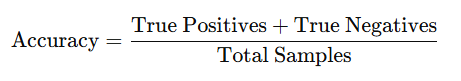

### a) 데이터 불균형 처리
- Accuracy: 불균형 데이터셋에서 정확도는 높은 비율의 클래스에 편향될 수 있다.

- 예를 들어, 클래스가 95% 대 5%로 불균형한 경우, 항상 다수 클래스(95%)를 예측하는 모델의 정확도는 95%가 된다.

- ROC-AUC: ROC AUC는 TPR과 FPR(거짓 양성)을 모두 고려하기 때문에, 불균형 데이터셋에서 더 유용한 평가 지표가 될 수 있다.

### b) 평가 기준
- Accuracy: 전체 예측의 올바른 비율만을 평가한다.

- ROC-AUC: 모델의 예측 확률의 순서를 평가하며, 양성과 음성을 얼마나 잘 구분하는지에 대한 전반적인 성능을 나타낸다.

### c) 활용 시기
- Accuracy: 클래스가 균형 잡힌 데이터셋에서 유용

- ROC-AUC: 불균형 데이터셋이나 예측 확률이 중요한 경우에 유용

### d) 해석
- Accuracy: 1에 가까울수록 전체 샘플 중 올바르게 예측한 비율이 높음을 의미한다.

- ROC-AUC: 1에 가까울수록 모델의 분류 성능이 뛰어나고, 양성과 음성을 잘 구분함을 의미한다.

## 02 코드 실습

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있기 때문에 전처리가 필요하다.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 표준 스케일링으로 평균이 0, 분산 1로 데이터 분포도 변환한다.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

처음에는 기본 solver 설정 값인 'lbfgs' 로 성능을 확인할 것이다.

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score # roc_auc_score란?

# 클래스 복제, 적합, 예측값, 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

accuracy = accuracy_score(y_test, lr_preds)
roc_auc = roc_auc_score(y_test, lr_preds)

# print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy, roc_auc))
print(f'accuracy: {accuracy:.3f}, roc_auc: {roc_auc:.3f}')

accuracy: 0.977, roc_auc: 0.972


서로 다른 solver 값으로 모델을 학습하고 성능을 평가해본다. 최대 반복 횟수를 지정해두는 것이 중요하다.

In [8]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 학습 후 성능 평가 반복
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)

    accuracy = accuracy_score(y_test, lr_preds)
    roc_auc = roc_auc_score(y_test, lr_preds)

    print(f'solver: {solver}, accuracy: {accuracy:.3f}, roc_auc: {roc_auc:.3f}')

solver: lbfgs, accuracy: 0.977, roc_auc: 0.972
solver: liblinear, accuracy: 0.982, roc_auc: 0.979
solver: newton-cg, accuracy: 0.977, roc_auc: 0.972
solver: sag, accuracy: 0.982, roc_auc: 0.979
solver: saga, accuracy: 0.982, roc_auc: 0.979


GridSerachCV를 이용해 solver, penalty, C를 최적화해본다.

In [11]:
from sklearn.model_selection import GridSearchCV

params= {'solver':['liblinear', 'lbfgs'],
         'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3) # 모델, 파라미터, 평가지표, cv란?
grid_clf.fit(data_scaled, cancer.target) # 주의

print(f'최적 하이퍼 파라미터: {grid_clf.best_params_}, 최적 평균 정확도: {grid_clf.best_score_:.3f}')

최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도: 0.979


C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\skle

최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도: 0.979 그 외 규제문제로 에러가 떴으나 무시해도 됨.

### 결론

1. 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어나기에 이진 분류의 기본 모델로 사용하는 경우가 많다.

2. 회소한 데이터 세트 분류에도 뛰어난 성능을 보여 텍스트 분류에서도 자주 사용 된다.

## 03 코드 실습2 중;;

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [13]:
data = pd.read_csv("C:/First-sean-project/dataset/diabetes.csv")
df = data.copy()

In [14]:
def check_df(dataframe: object, head: object = 5) -> object:
    print("Shape")
    print(dataframe.shape)
    print("Types")
    print(dataframe.dtypes)
    print("NANs")
    print(dataframe.isnull().sum())
    print("Quantiles")
    print(dataframe.quantile([0, 0.05,0.1, 0.25, 0.50,0.75, 0.90, 0.95, 0.99, 1]).T)
check_df(df)

Shape
(768, 9)
Types
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
NANs
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Quantiles
                          0.000  0.050  0.100  0.250   0.500   0.750   0.900   0.950   0.990   1.000
Pregnancies               0.000  0.000  0.000  1.000   3.000   6.000   9.000  10.000  13.000  17.000
Glucose                   0.000 79.000 85.000 99.000 117.000 140.250 167.000 181.000 196.000 199.000
BloodPressure             0.000 38.700 5

In [15]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normal = scaler.fit_transform(df)
df2 = pd.DataFrame(normal, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [18]:
x = pd.DataFrame(df2, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df2.Outcome.values.reshape(-1,1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
logreg = LogisticRegression(solver='liblinear')

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
kf = KFold(10)
result_validation = cross_val_score(logreg, x_train, y_train, cv=kf)

C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d

In [22]:
result_validation

array([0.75806452, 0.64516129, 0.80645161, 0.80645161, 0.73770492,
       0.81967213, 0.7704918 , 0.68852459, 0.7704918 , 0.78688525])

In [23]:
print(np.mean(result_validation))

0.7589899524061343


In [24]:
logreg.fit(x_train, y_train.ravel())

LogisticRegression(solver='liblinear')

In [25]:
y_pred = logreg.predict(x_test)
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [26]:
compare =pd.DataFrame({'actual': y_test.flatten(),
          'predict' : y_pred.flatten()})
compare

,actual,predict
0,1.000,1.000
1,0.000,0.000
2,0.000,0.000
3,1.000,1.000
4,0.000,0.000
...,...,...
149,1.000,0.000
150,0.000,0.000
151,1.000,0.000
152,0.000,0.000


In [27]:
from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8051948051948052


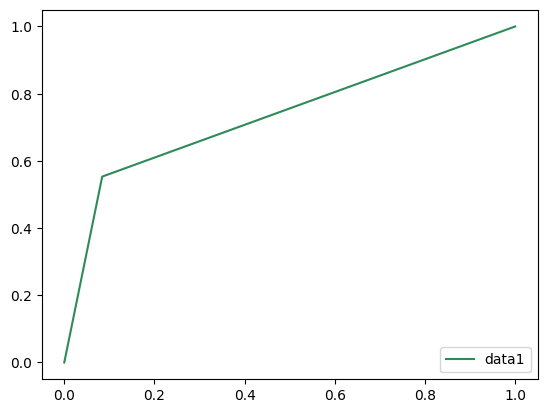

In [28]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='data1', color="seagreen")
plt.legend(loc=4)
plt.show()

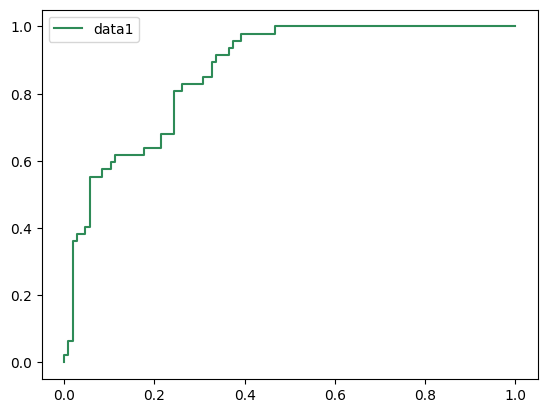

In [29]:
y_pred_proba = logreg.predict_proba(x_test)[ : : ,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data1', color="seagreen")
plt.legend(loc='best')
plt.show()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
logreg.classes_

array([0., 1.])

In [31]:
logreg.coef_

array([[ 1.01061794,  3.79448512, -1.1695735 ,  0.39307893, -0.03604907,
         2.38981879,  1.1800004 ,  1.17794597]])

In [32]:
logreg.intercept_

array([-4.17079895])

In [33]:
logreg.predict(x)

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [34]:
logreg.predict_proba(x)

array([[0.37770833, 0.62229167],
       [0.84901719, 0.15098281],
       [0.37151398, 0.62848602],
       ...,
       [0.7263303 , 0.2736697 ],
       [0.63760702, 0.36239298],
       [0.83816461, 0.16183539]])

In [36]:
logreg.score(x, y)

0.76953125

In [37]:
confusion_matrix(y, logreg.predict(x))

array([[453,  47],
       [130, 138]], dtype=int64)

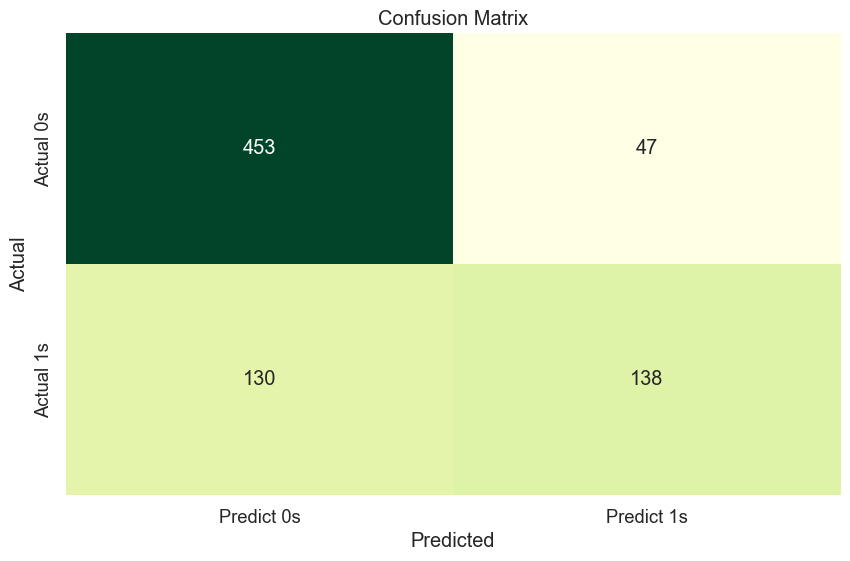

In [38]:
# confusion matrix heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y, logreg.predict(x)) , annot=True, fmt="d", cmap="YlGn", cbar=False,
            xticklabels=['Predict 0s', 'Predict 1s'], yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
print(classification_report(y, logreg.predict(x)))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       500
         1.0       0.75      0.51      0.61       268

    accuracy                           0.77       768
   macro avg       0.76      0.71      0.72       768
weighted avg       0.77      0.77      0.76       768



C:\Users\DA\AppData\Local\Temp\ipykernel_16784\4128517022.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",


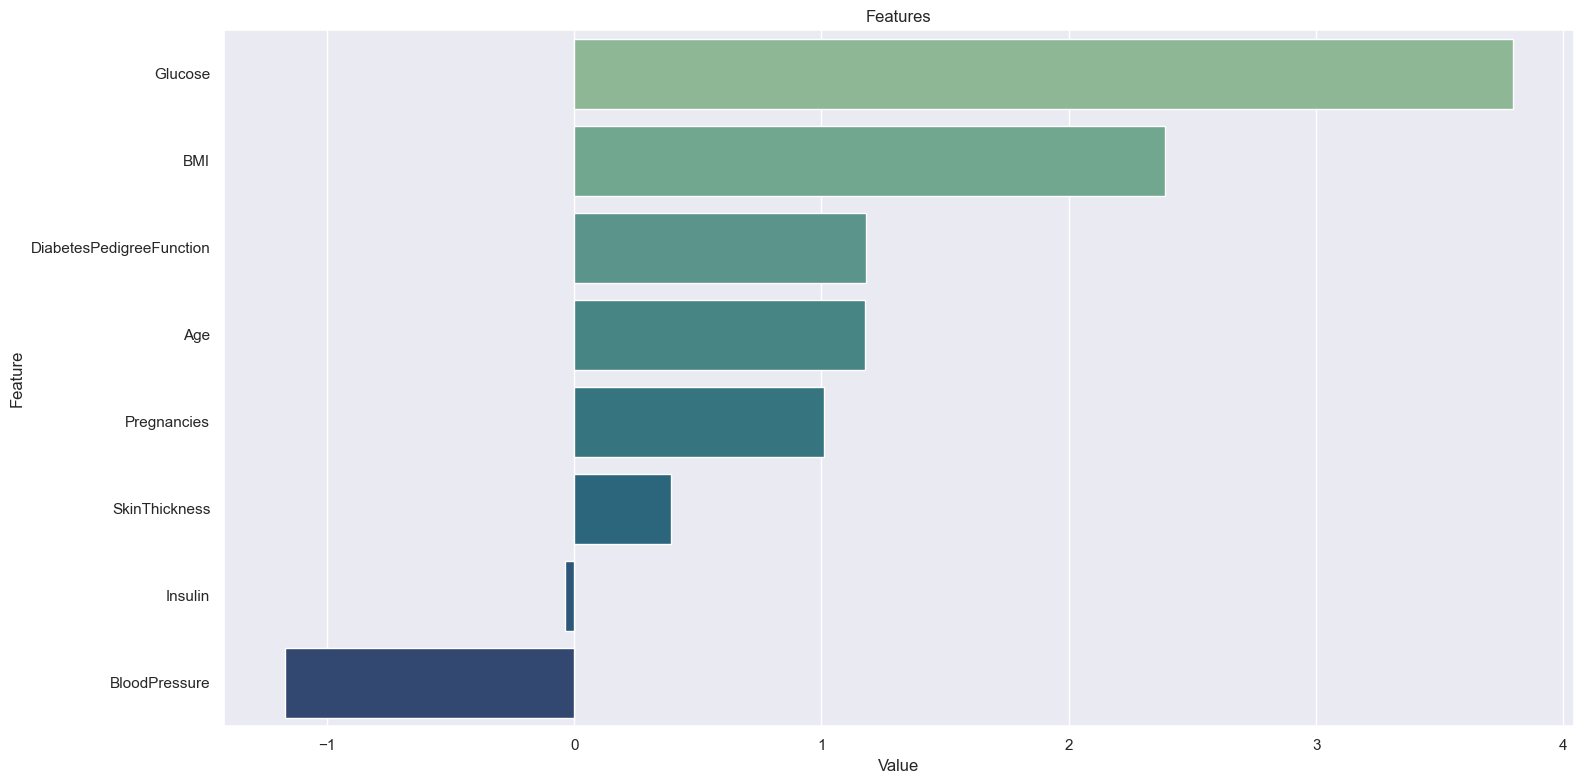

In [40]:
feature_imp = pd.DataFrame({'Value': logreg.coef_[0], 'Feature': x.columns})
plt.figure(figsize=(16, 8))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:8], palette="crest")
plt.title('Features')
plt.tight_layout()
plt.show()

x_train: (614, 8)
x_test: (154, 8)
y_train: (614, 1)
y_test: (154, 1)


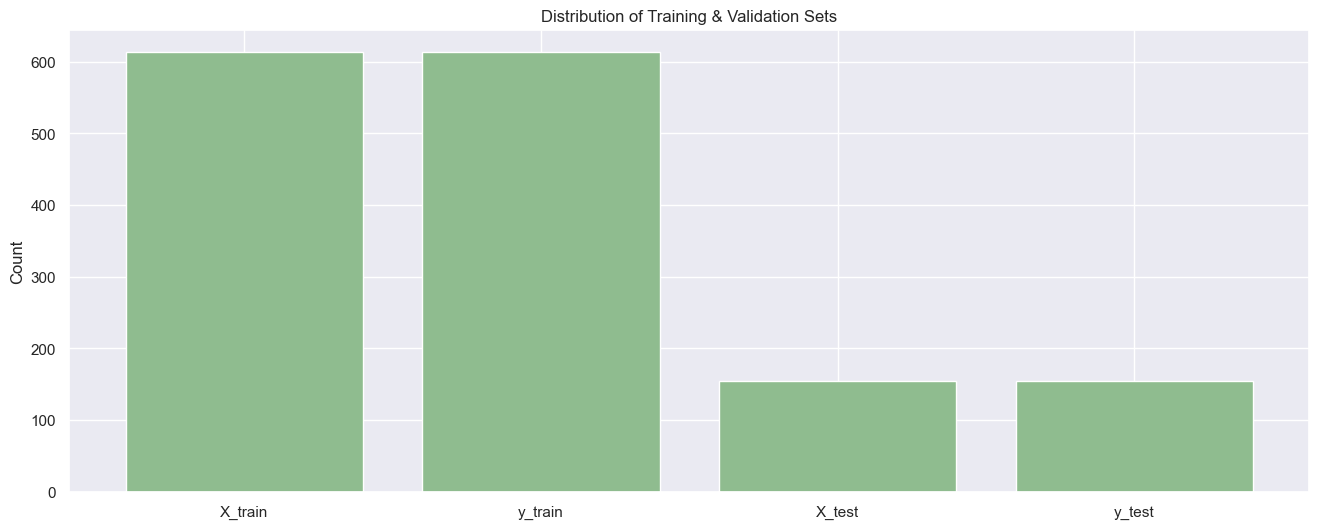

In [41]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]}
plt.figure(figsize=(16, 6))
plt.bar(shapes.keys(), shapes.values(),color="darkseagreen")
plt.ylabel('Count')
plt.title('Distribution of Training & Validation Sets')
plt.show()

In [42]:
from numpy import reshape
y = reshape(y, (y.shape[0],))

In [43]:
from numpy import ravel
y = ravel(y)

In [44]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import column_or_1d 
scaler = MinMaxScaler(feature_range=(0, 1))
normal = scaler.fit_transform(df)
df10 = pd.DataFrame(normal, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
x = pd.DataFrame(df10, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df10.Outcome.values
y = column_or_1d(y, warn=True)  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model1 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
kf = KFold(10)
result_validation = cross_val_score(model1, x_train, y_train, cv=kf)
model1.fit(x_train, y_train.ravel())
y_pred = model1.predict(x_test)
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, random_state=0)
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train) 
print(f"Best: {grid_result.best_score_} by using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: 0.7558196721311475 by using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7558196721311475 (0.05662373114762446) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7554970914859861 (0.056885077710638464) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7558196721311475 (0.05662373114762446) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.7554944473823373 (0.057275265456152094) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.7558196721311475 (0.05662373114762446) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.7528847170809094 (0.057655868048625616) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7528847170809094 (0.05742982284738792) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7525621364357482 (0.05692969081213978) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.7528847170809094 (0.057655868048625616) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.7528847170809094 (0.057655868048625616) with: {'C': 10, 

In [45]:
model1.predict(x)

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

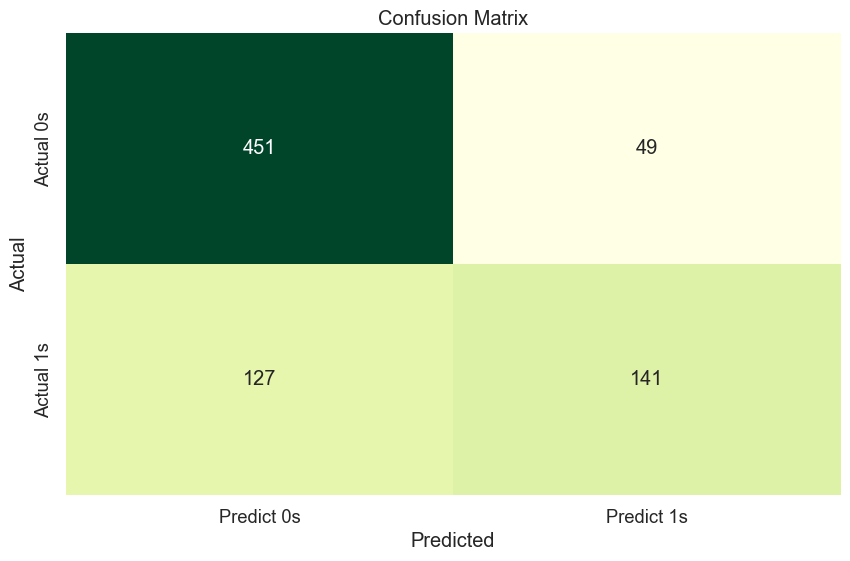

In [46]:
# Create a confusion matrix heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y, model1.predict(x)) , annot=True, fmt="d", cmap="YlGn", cbar=False,
            xticklabels=['Predict 0s', 'Predict 1s'], yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
print(classification_report(y, model1.predict(x)))

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       500
         1.0       0.74      0.53      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.71      0.73       768
weighted avg       0.77      0.77      0.76       768

